# Module 3A: Statistical properties of time series data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from utils_statsmodels import bglm_test, dynamic_pred

## Question 3.8

In [90]:
# Load data
idarma = pd.read_csv("data/module3_data_Identifying_ARMA.csv")

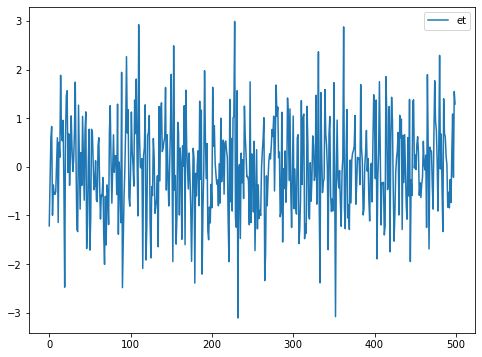

In [11]:
# Always plot the data!
idarma.plot(figsize=(8, 6));

In [12]:
print(f'mean: {np.mean(idarma["et"]):.3f}')
print(f'std: {np.std(idarma["et"]):.3f}')

mean: -0.028
std: 0.981


## Question 3.9

Using et as the white noise disturbance, and assuming the initial value of y to be equal to zero generate a new random variable yar, which follows the following AR(1) process:

$y_{t} = 3.0 + 0.55 y_{t-1} + \epsilon_t$

Enter the value of the 5th observation of variable yar (to three decimal places, without any rounding):

In [88]:
et = idarma.et.values
ar1 = np.zeros(len(et))
for i in range(len(ar1) - 1):
    ar1[i+1] = 3 + 0.55 * ar1[i] + et[i+1]

pd.Series(ar1)[4]



5.647962734609875

## Question 3.10

Also using et as the white noise disturbance and again assuming that the initial value of y is equal to zero, generate the variable yma which follows the following MA(1) process:

$y_{t} = -2.5 + \epsilon_t + 0.7 \epsilon_{t-1}$

In [39]:
ma1 = np.zeros(len(et))
for i in range(len(ma1) - 1):
    ma1[i+1] = -2.5 + et[i+1] + 0.7 * et[i]

pd.Series(ma1)[4]

-2.9154436509

## Question 3.11
Based on the patterns of ACF and PACF observed in the past lecture for an AR(1) process, which of the following statements is true?

/home/joao/moocs/time-series/envs/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'PACF - MA1')

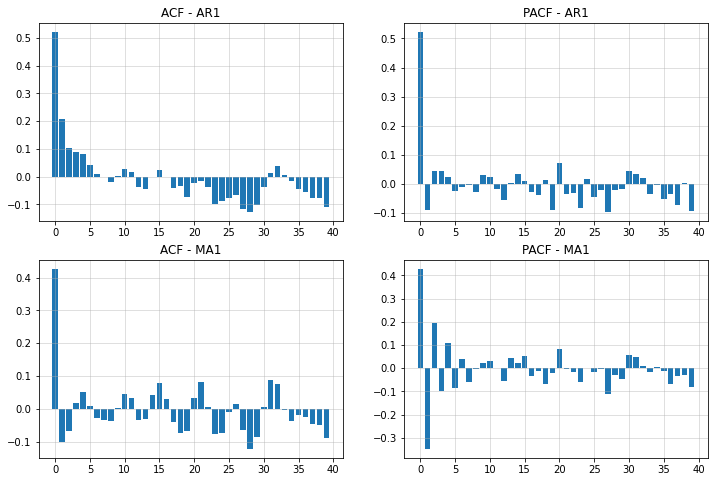

In [71]:
from statsmodels.tsa.stattools import acf, pacf

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

acf_ar1 = acf(ar1, nlags=40)
pacf_ar1 = pacf(ar1, nlags=40)
acf_ma1 = acf(ma1, nlags=40)
pacf_ma1 = pacf(ma1, nlags=40)


for i in [0, 1]:
    for j in [0, 1]:
        ax[i, j].grid(which='major', alpha=0.5)


ax[0, 0].bar(range(len(acf_ar1)-1), acf_ar1[1:])
ax[0, 0].set_title("ACF - AR1")
ax[0, 1].bar(range(len(acf_ar1)-1), pacf_ar1[1:])
ax[0, 1].set_title("PACF - AR1")
ax[1, 0].bar(range(len(acf_ar1)-1), acf_ma1[1:])
ax[1, 0].set_title("ACF - MA1")
ax[1, 1].bar(range(len(acf_ar1)-1), pacf_ma1[1:])
ax[1, 1].set_title("PACF - MA1")


## Question 3.12

Lastly, also using et as the white noise disturbance and assuming that the initial value of y is equal to zero, generate variable yarma which follows an ARMA(1,1) process:

$y_{t} = 0.5 + 0.55 y_{t-1} + \epsilon_t + 0.7 \epsilon_{t-1}$

In [72]:
arma11 = np.zeros(len(et))
for i in range(len(arma11) - 1):
    arma11[i+1] = 0.5 + 0.55 * arma11[i] + et[i+1] + 0.7 * et[i]

pd.Series(arma11)[4]

1.2061955946395875

## Question 3.13

Compute the ACF at lags 1-20 for the four series: et and Variables yar,yma and yarma and present the ACF at lag 1 for each of them.

In [81]:
vars = [et, ar1, ma1, arma11]
names = ['et', 'ar1', 'ma1', 'arma11']

for var, name in zip(vars, names):
    print(f'ACF {name} 1: {acf(var, nlags=20, fft=True)[1]}')


#acf(et, nlags=20, fft=False)[1]

ACF et 1: 0.023593845872415645
ACF ar1 1: 0.5212102638053465
ACF ma1 1: 0.42613799865435564
ACF arma11 1: 0.72656922353243


## Question 3.14

For the theoretical process underlying Variable AR1, what would be the ACF for lag 2 (to three decimal places, without any rounding)?

In [89]:
tar1 = np.zeros(len(et))
for i in range(len(tar1) - 1):
    tar1[i+1] = 3 + 0.55 * tar1[i]
    
pd.Series(tar1)
acf(tar1, nlags=5)

array([1.        , 0.54998613, 0.30247225, 0.16633338, 0.09145076,
       0.05025907])

## Question 3.15

Enter the values (using 3 decimal places, without any rounding) for the ACF at two lags for each series below:

In [92]:
vars = [et, ar1, ma1, arma11]
names = ['et', 'ar1', 'ma1', 'arma11']

for var, name in zip(vars, names):
    print(f'ACF {name} 2: {acf(var, nlags=20, fft=True)[2]}')

ACF et 2: -0.09905610126515028
ACF ar1 2: 0.2063701543512698
ACF ma1 2: -0.101539901006131
ACF arma11 2: 0.33086477779497714


## Question 3.16

Based on the definition of the partial autocorrelation (PAC) and the patterns of behavior shown in the previous video lecture, what should be the PAC at lags 1 and 2 for the theoretical process underlying Variable AR1?

$0.55$ and $0.00$, because theoretically should be no partial correlation between variables more $p=1$ lags away.

## Question 3.17

Estimate the PAC for variable yar for lag 1, then for lag 2.

In [111]:
dfar = (
    pd.DataFrame({'ar1': ar1})
    .assign(
        lag1 = lambda x: x.ar1.shift(1),
        lag2 = lambda x: x.ar1.shift(2)
    ).dropna()
)

smf.ols('ar1 ~ lag1', data=dfar).fit().params

Intercept    3.165231
lag1         0.521014
dtype: float64

## Question 3.18

Enter the PAC for two lags (to three decimal places, without any rounding):

In [113]:
smf.ols('ar1 ~ lag1 + lag2', data=dfar).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ar1   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     96.93
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           3.00e-36
Time:                        22:18:26   Log-Likelihood:                -694.97
No. Observations:                 498   AIC:                             1396.
Df Residuals:                     495   BIC:                             1409.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4238      0.283     12.093      0.000       2.867       3.980
lag1           0.5699      0.045     12.709      0.000       0.482       0.658
lag2          -0.0883      0.044     -2.028      0.043      -0.174      -0.003
==============================================================================
Omnibus:                        0.891   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.641   Jarque-Bera (JB):                0.697
Skew:                           0.025   Prob(JB):                        0.706
Kurtosis:                       3.176   Cond. No.                         61.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""